In [1]:
!pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.4
    Uninstalling xgboost-1.7.4:
      Successfully uninstalled xgboost-1.7.4


In [2]:
import numpy as np
import pandas as pd

Import Libraries

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as mt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler, MaxAbsScaler,RobustScaler,QuantileTransformer ,Normalizer,PowerTransformer

Reading Dataset

In [4]:
df = pd.read_csv("/content/crop2.csv")

In [5]:
df.head()

,Crop,N,P,K,pH
0,Rice,129,34,160,4.8
1,Wheat,80,40,40,5.5
2,Jowar(Sorghum),100,40,0,5.5
3,Barley(JAV),80,40,40,5.5
4,Bajra(Pearl Millet),70,40,45,5.5


In [6]:
df.tail()

,Crop,N,P,K,pH
716,potato,102,17,58,5.6
717,potato,41,23,135,5.0
718,potato,49,45,90,5.8
719,potato,131,24,121,4.9
720,potato,131,55,130,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    721 non-null    object 
 1   N       721 non-null    int64  
 2   P       721 non-null    int64  
 3   K       721 non-null    int64  
 4   pH      721 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 28.3+ KB


No of Categories VS No of Samples

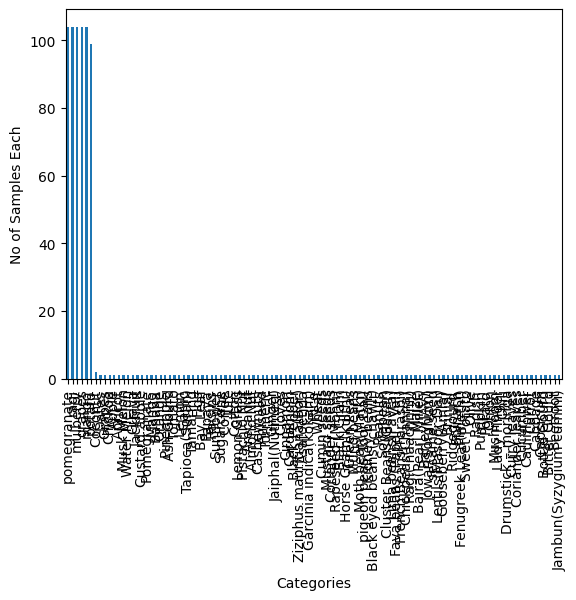

In [8]:
labels = df["Crop"].unique()
df["Crop"].value_counts().plot(kind="bar")
plt.xlabel('Categories')
plt.ylabel('No of Samples Each')
plt.show()

Range of Values Vs Count for Each Parameter

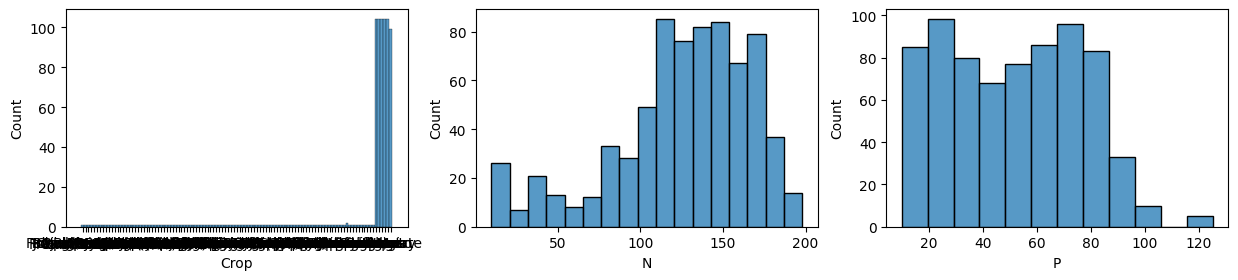

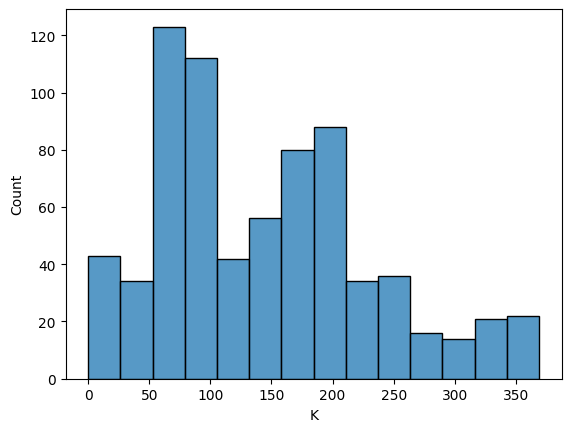

In [9]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(4,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[all_columns[-1]])
plt.show()

Parameter Values vs Crop Type

In [10]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Crop']= label_encoder.fit_transform(df['Crop'])

df['Crop'].unique()


array([ 85,  97,  56,   9,   7,  64,  82,  25,  44,  41,  63,  29,  87,
        75,  15,  58, 102,  66,  67,  50,  52,  13,  84,  33,  70, 106,
        36,  62,  17,  11,  12,  16,  19,  18,  21,  23,  35,  32,  37,
        40,  26,  59,  68,  72,  79,  80,  81,  71,  91,  42,  88,  86,
        48,  55,  98,  45,  92,  93,  46,  60,  94,   6,  76,  78,   8,
        65,  49,  53,  51,  96,  69,   3,   2,  24,  38,  39,  43,  73,
        74,   1,   5,  10,  14,  20,  27,  28,  54,  47,  95,  22,  83,
        30,   0,   4,  77,  61,  34,  57,  31,  89,  90, 103, 100,  99,
       101, 105, 104])

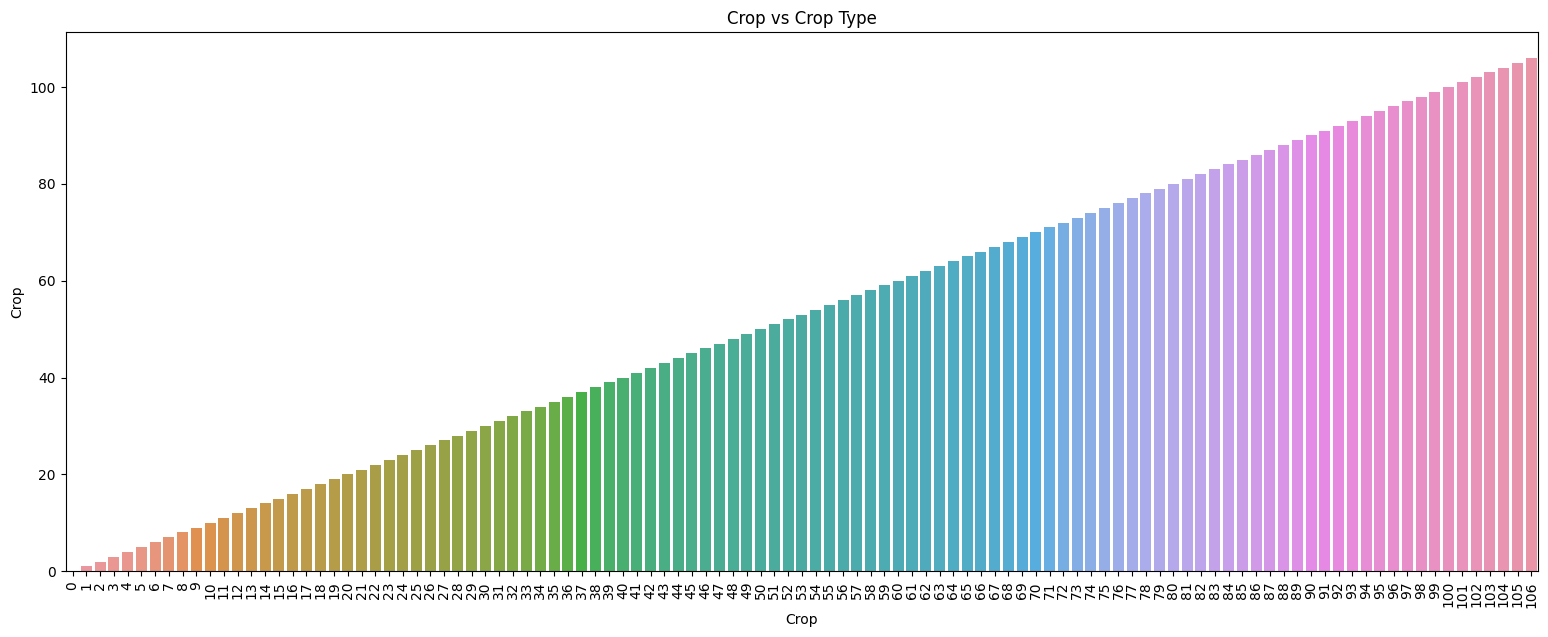

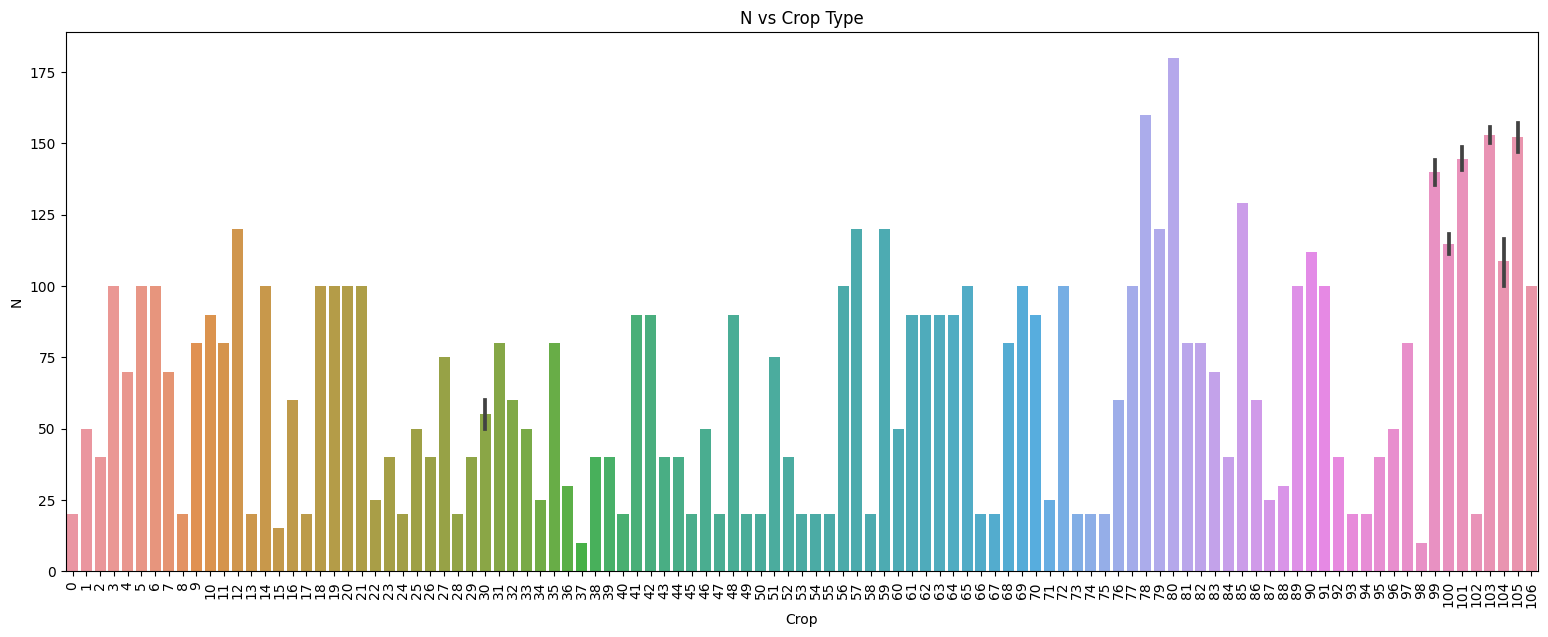

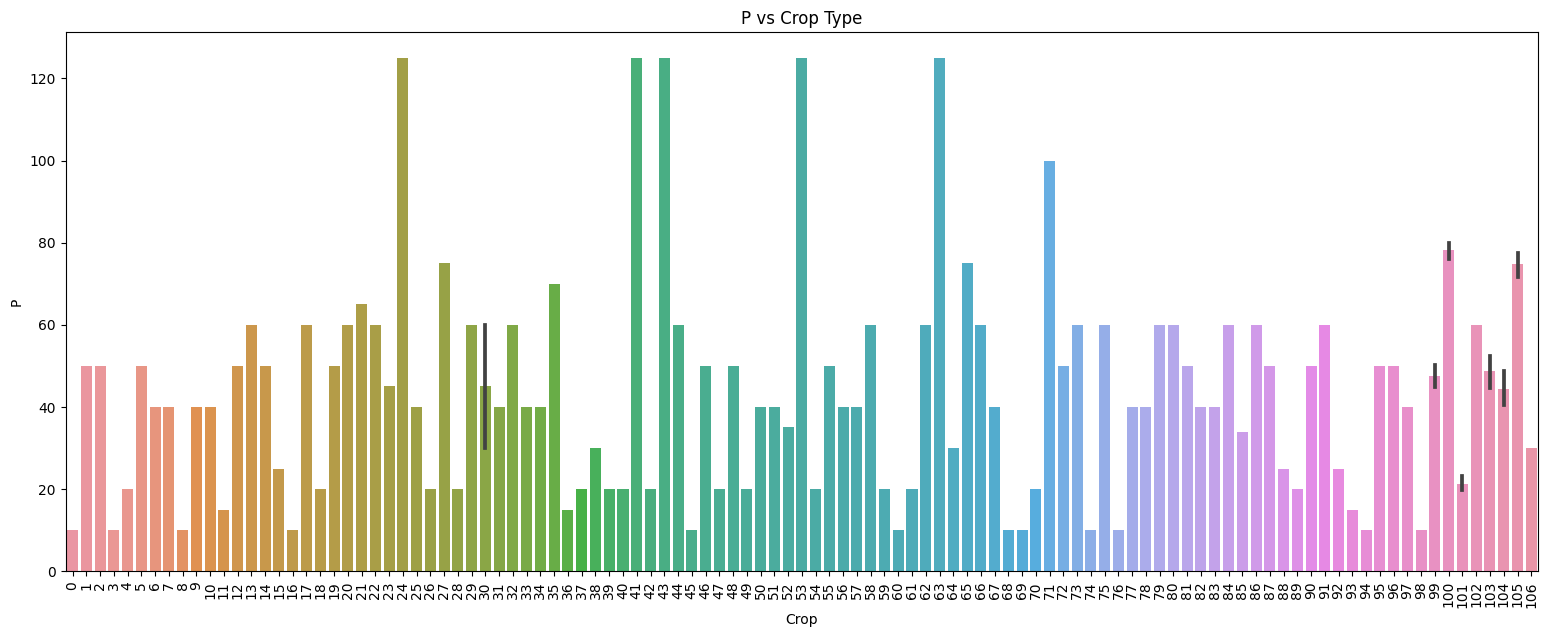

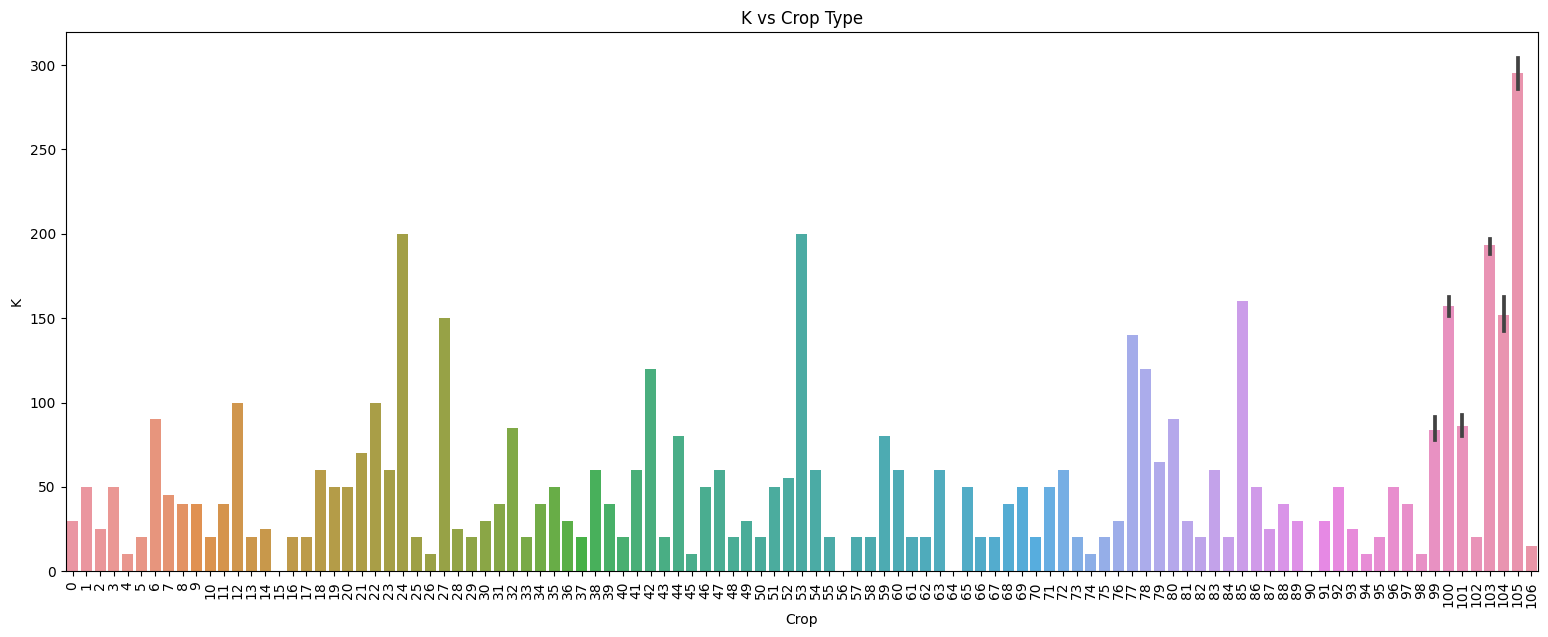

In [11]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "Crop", y = column, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

Pairplot Showing Distribution Graph of Parameter Values for Crop Types

<Figure size 10000x8000 with 0 Axes>

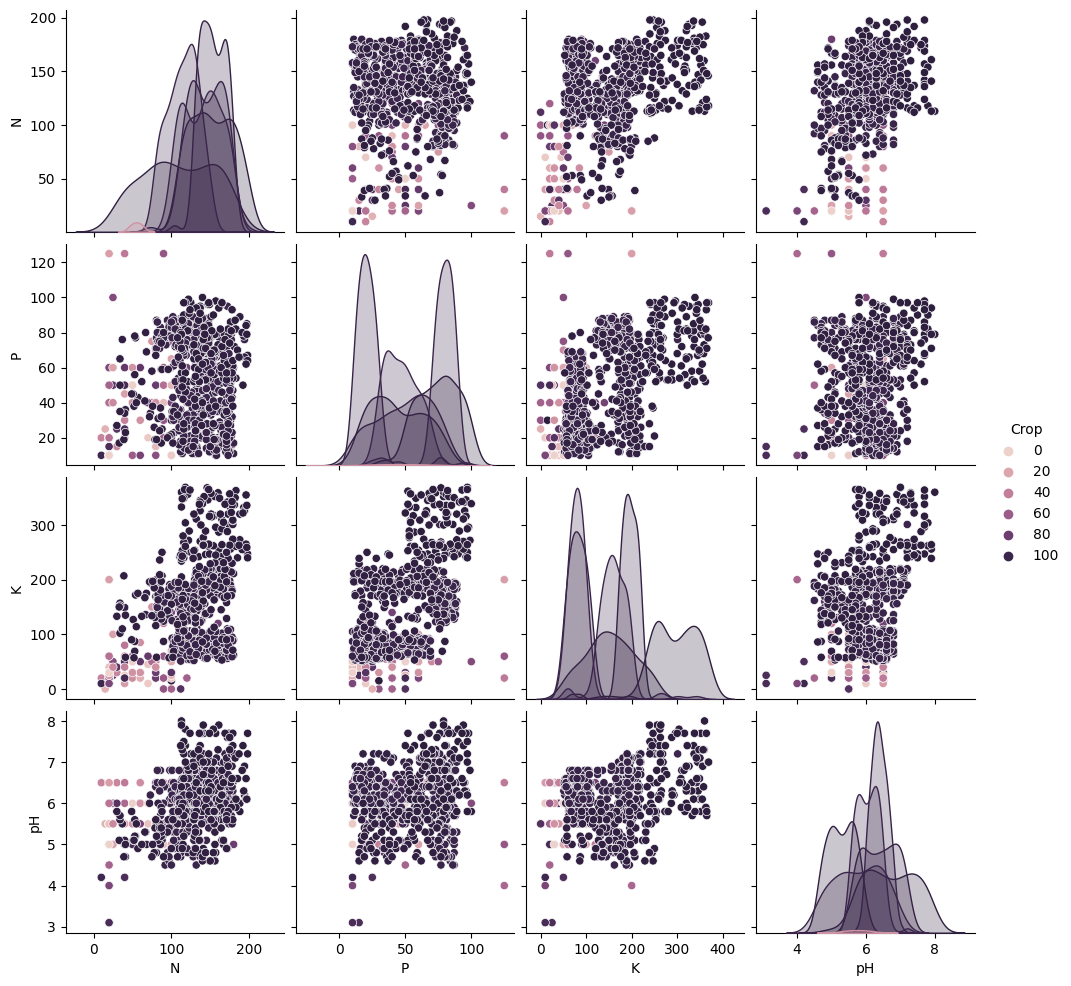

In [12]:
plt.figure(figsize=(100,80))
sns.pairplot(df, hue = "Crop")
plt.show()

Correlation Matrix Using Heat Map

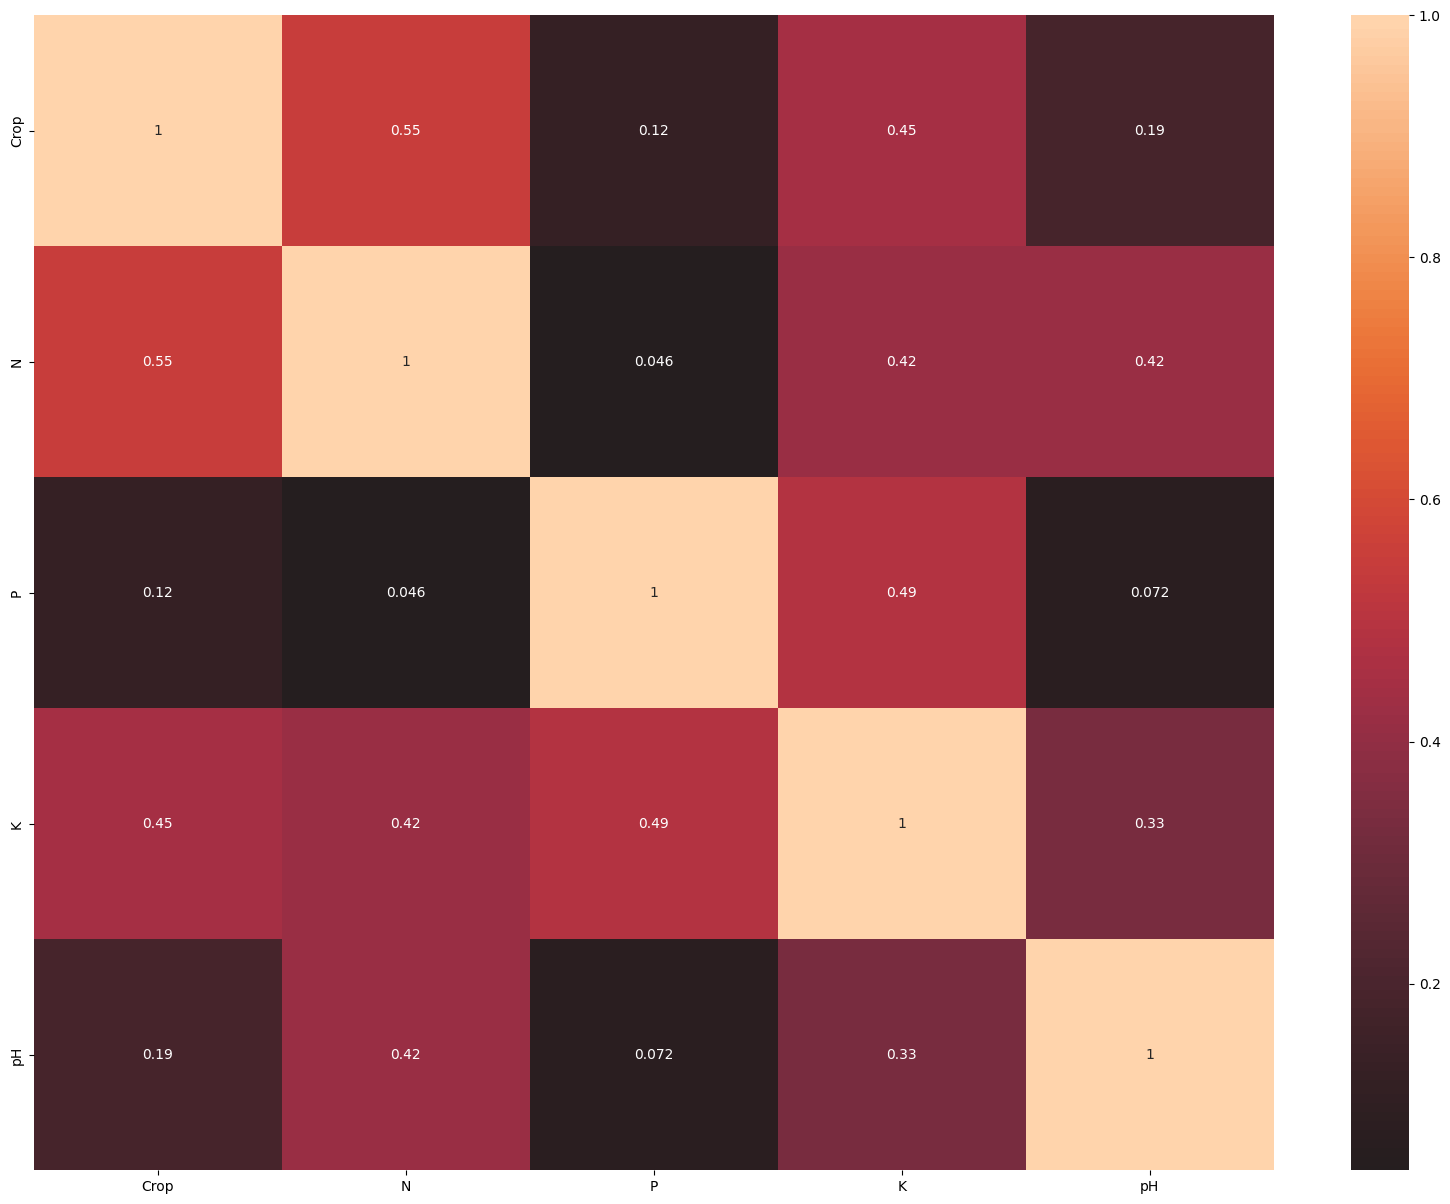

In [13]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
dg = scaler.fit_transform(df)

Label Encoding

In [15]:
label_encoder = LabelEncoder()
X = df.loc[:,['N','P','K','pH']].astype(float)
y = label_encoder.fit_transform(df["Crop"])
print(X.shape, y.shape)

(721, 4) (721,)


In [16]:
label_dict = {}
for i in range(6):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

Splitting the Dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (576, 4), (576,)
Train Data: (145, 4), (145,)


Importing the Essential Models for Training

In [19]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from sklearn.pipeline import make_pipeline

In [20]:
acc = []
acc_test = []
model = []
f1scores = []

Logistic Regression

Accuracy on Test Data: 68.96551724137932%


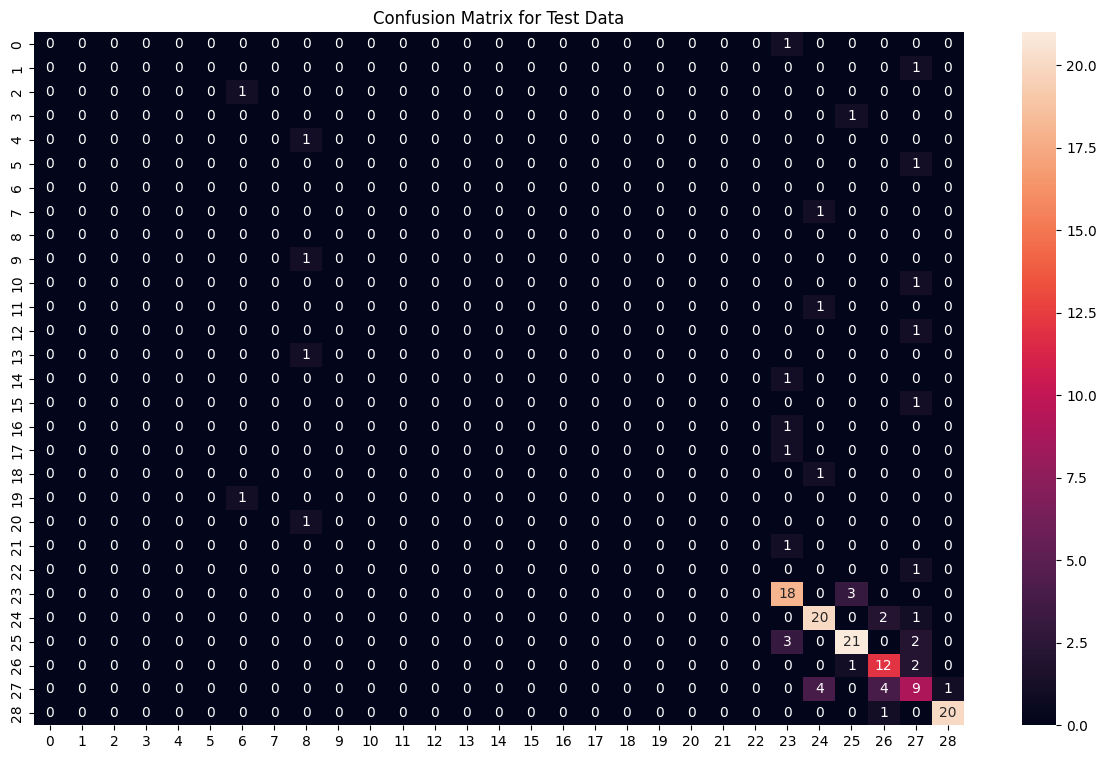


Accuracy on Whole Data: 72.95423023578364%


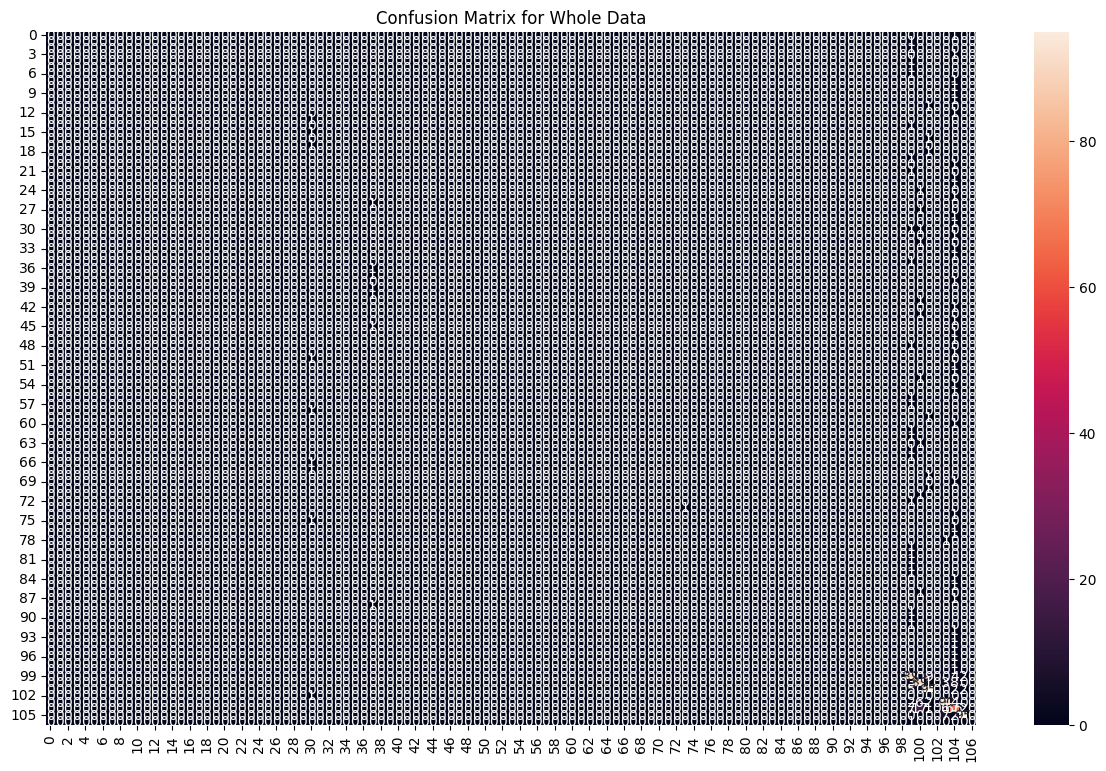

In [21]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=2,max_iter=1000000)).fit(X_train, y_train)
lr_best=lr_pipeline
# Accuray On Test Data
predictions = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = lr_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Logistic Regression')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

K Neighbors Classifier

Accuracy at k = 1 is 0.6896551724137931
Accuracy at k = 2 is 0.6620689655172414
Accuracy at k = 3 is 0.7034482758620689
Accuracy at k = 4 is 0.7103448275862069
Accuracy at k = 5 is 0.696551724137931
Accuracy at k = 6 is 0.696551724137931
Accuracy at k = 7 is 0.696551724137931
Accuracy at k = 8 is 0.7172413793103448
Accuracy at k = 9 is 0.696551724137931
Accuracy at k = 10 is 0.7034482758620689
Accuracy at k = 11 is 0.696551724137931
Accuracy at k = 12 is 0.7103448275862069
Accuracy at k = 13 is 0.7034482758620689
Accuracy at k = 14 is 0.7034482758620689
Accuracy at k = 15 is 0.696551724137931
Accuracy at k = 16 is 0.696551724137931
Accuracy at k = 17 is 0.6827586206896552
Accuracy at k = 18 is 0.6896551724137931
Accuracy at k = 19 is 0.6827586206896552
Accuracy at k = 20 is 0.6896551724137931
Accuracy at k = 21 is 0.6827586206896552
Accuracy at k = 22 is 0.6827586206896552
Accuracy at k = 23 is 0.6896551724137931
Accuracy at k = 24 is 0.6758620689655173
Accuracy at k = 25 is 0.69655172

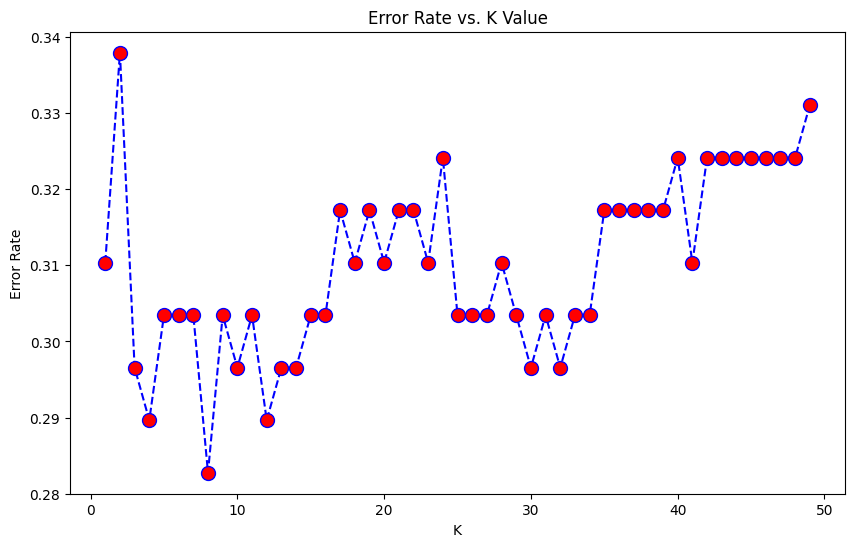

In [34]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i)).fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 70.34482758620689%


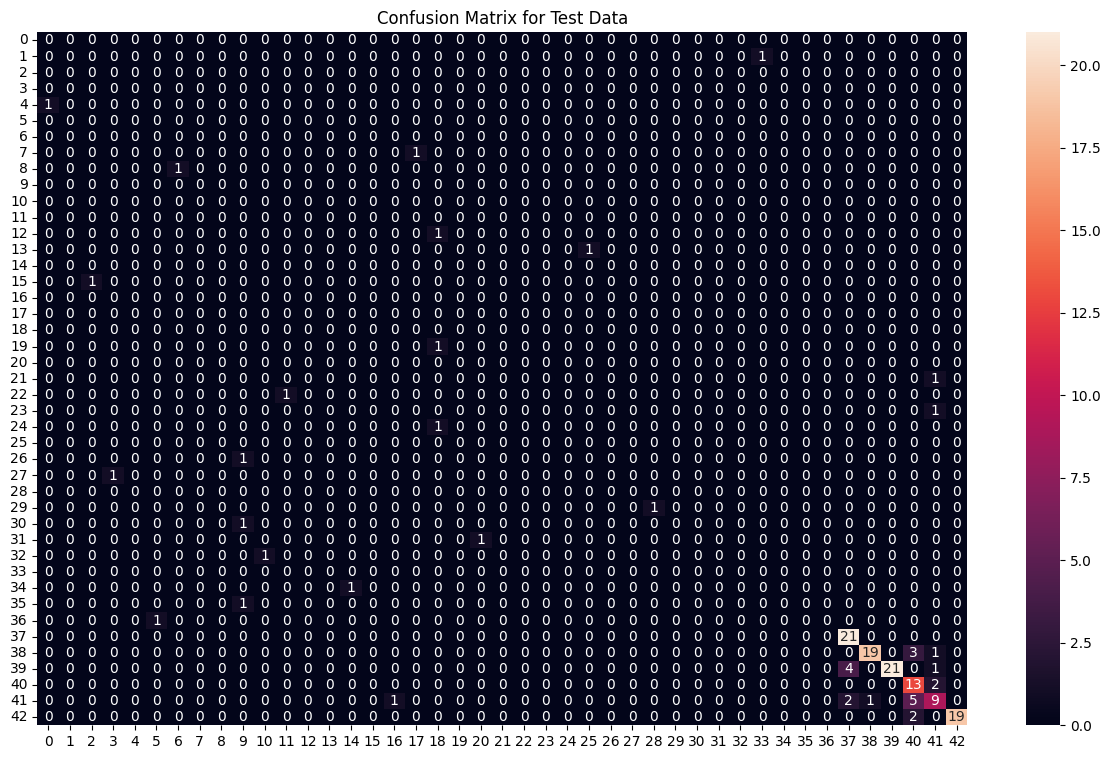


Accuracy on Whole Data: 81.41470180305132%


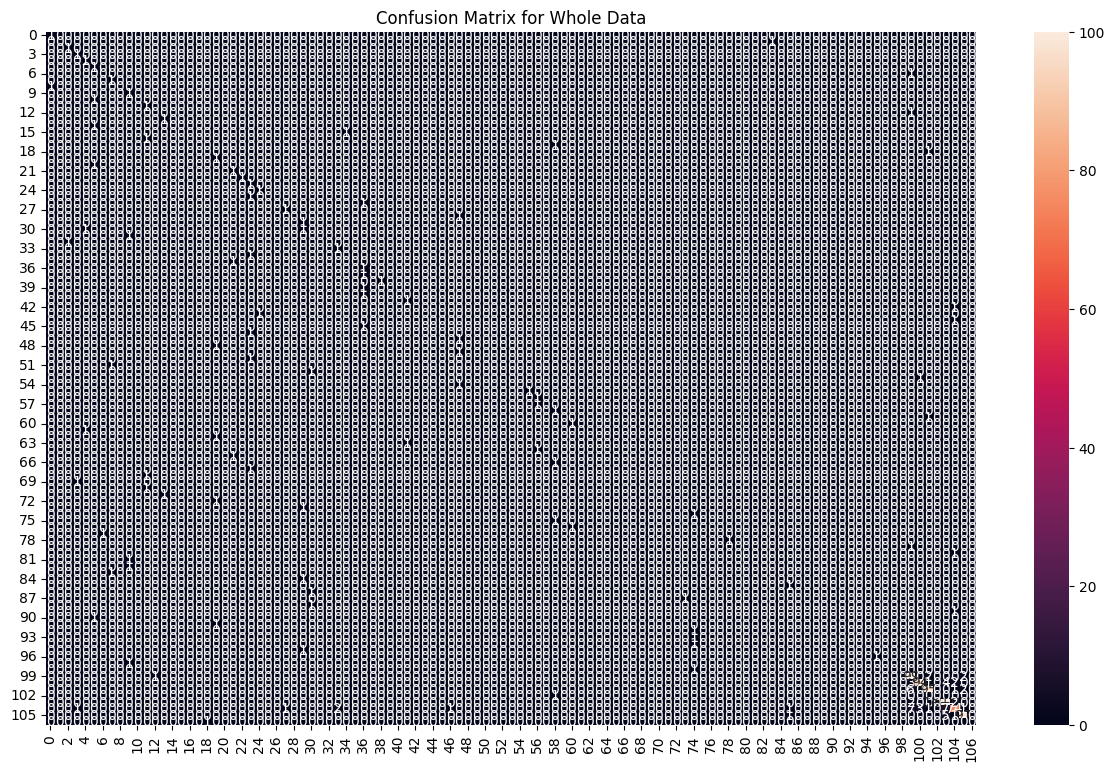

In [33]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 3)).fit(X_train, y_train)
knn_best=knn_pipeline
# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('K Neighbor Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Random Forest Classifier

Accuracy on Test Data: 71.03448275862068%


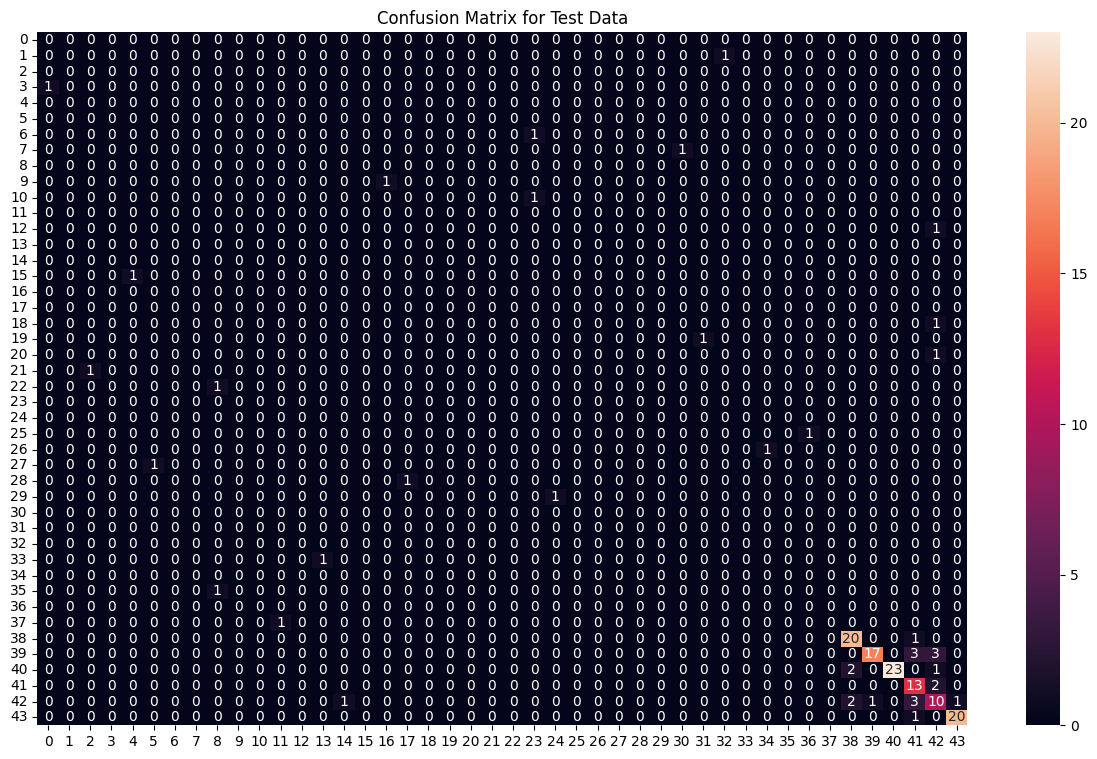


Accuracy on Whole Data: 93.06518723994452%


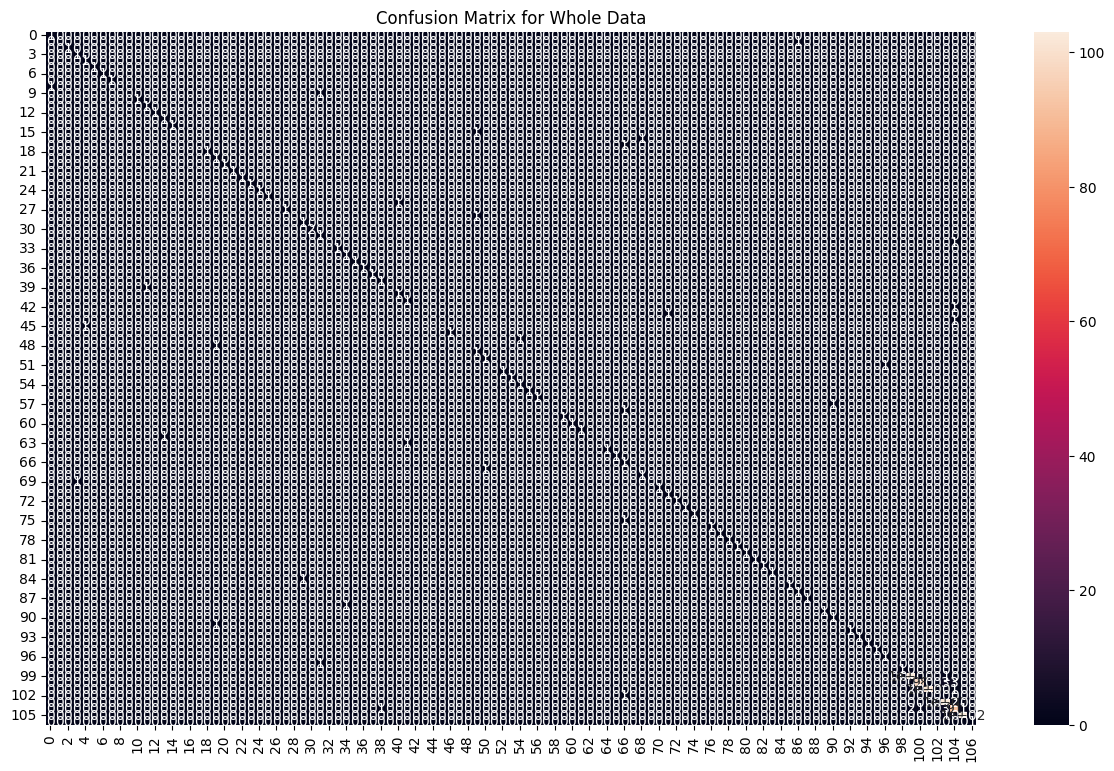

In [25]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18)).fit(X_train, y_train)
rf_best=rf_pipeline
# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Random Forest Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

XGBoost Classifier

In [26]:
import xgboost
from xgboost import XGBClassifier

Accuracy on Test Data: 73.79310344827587%


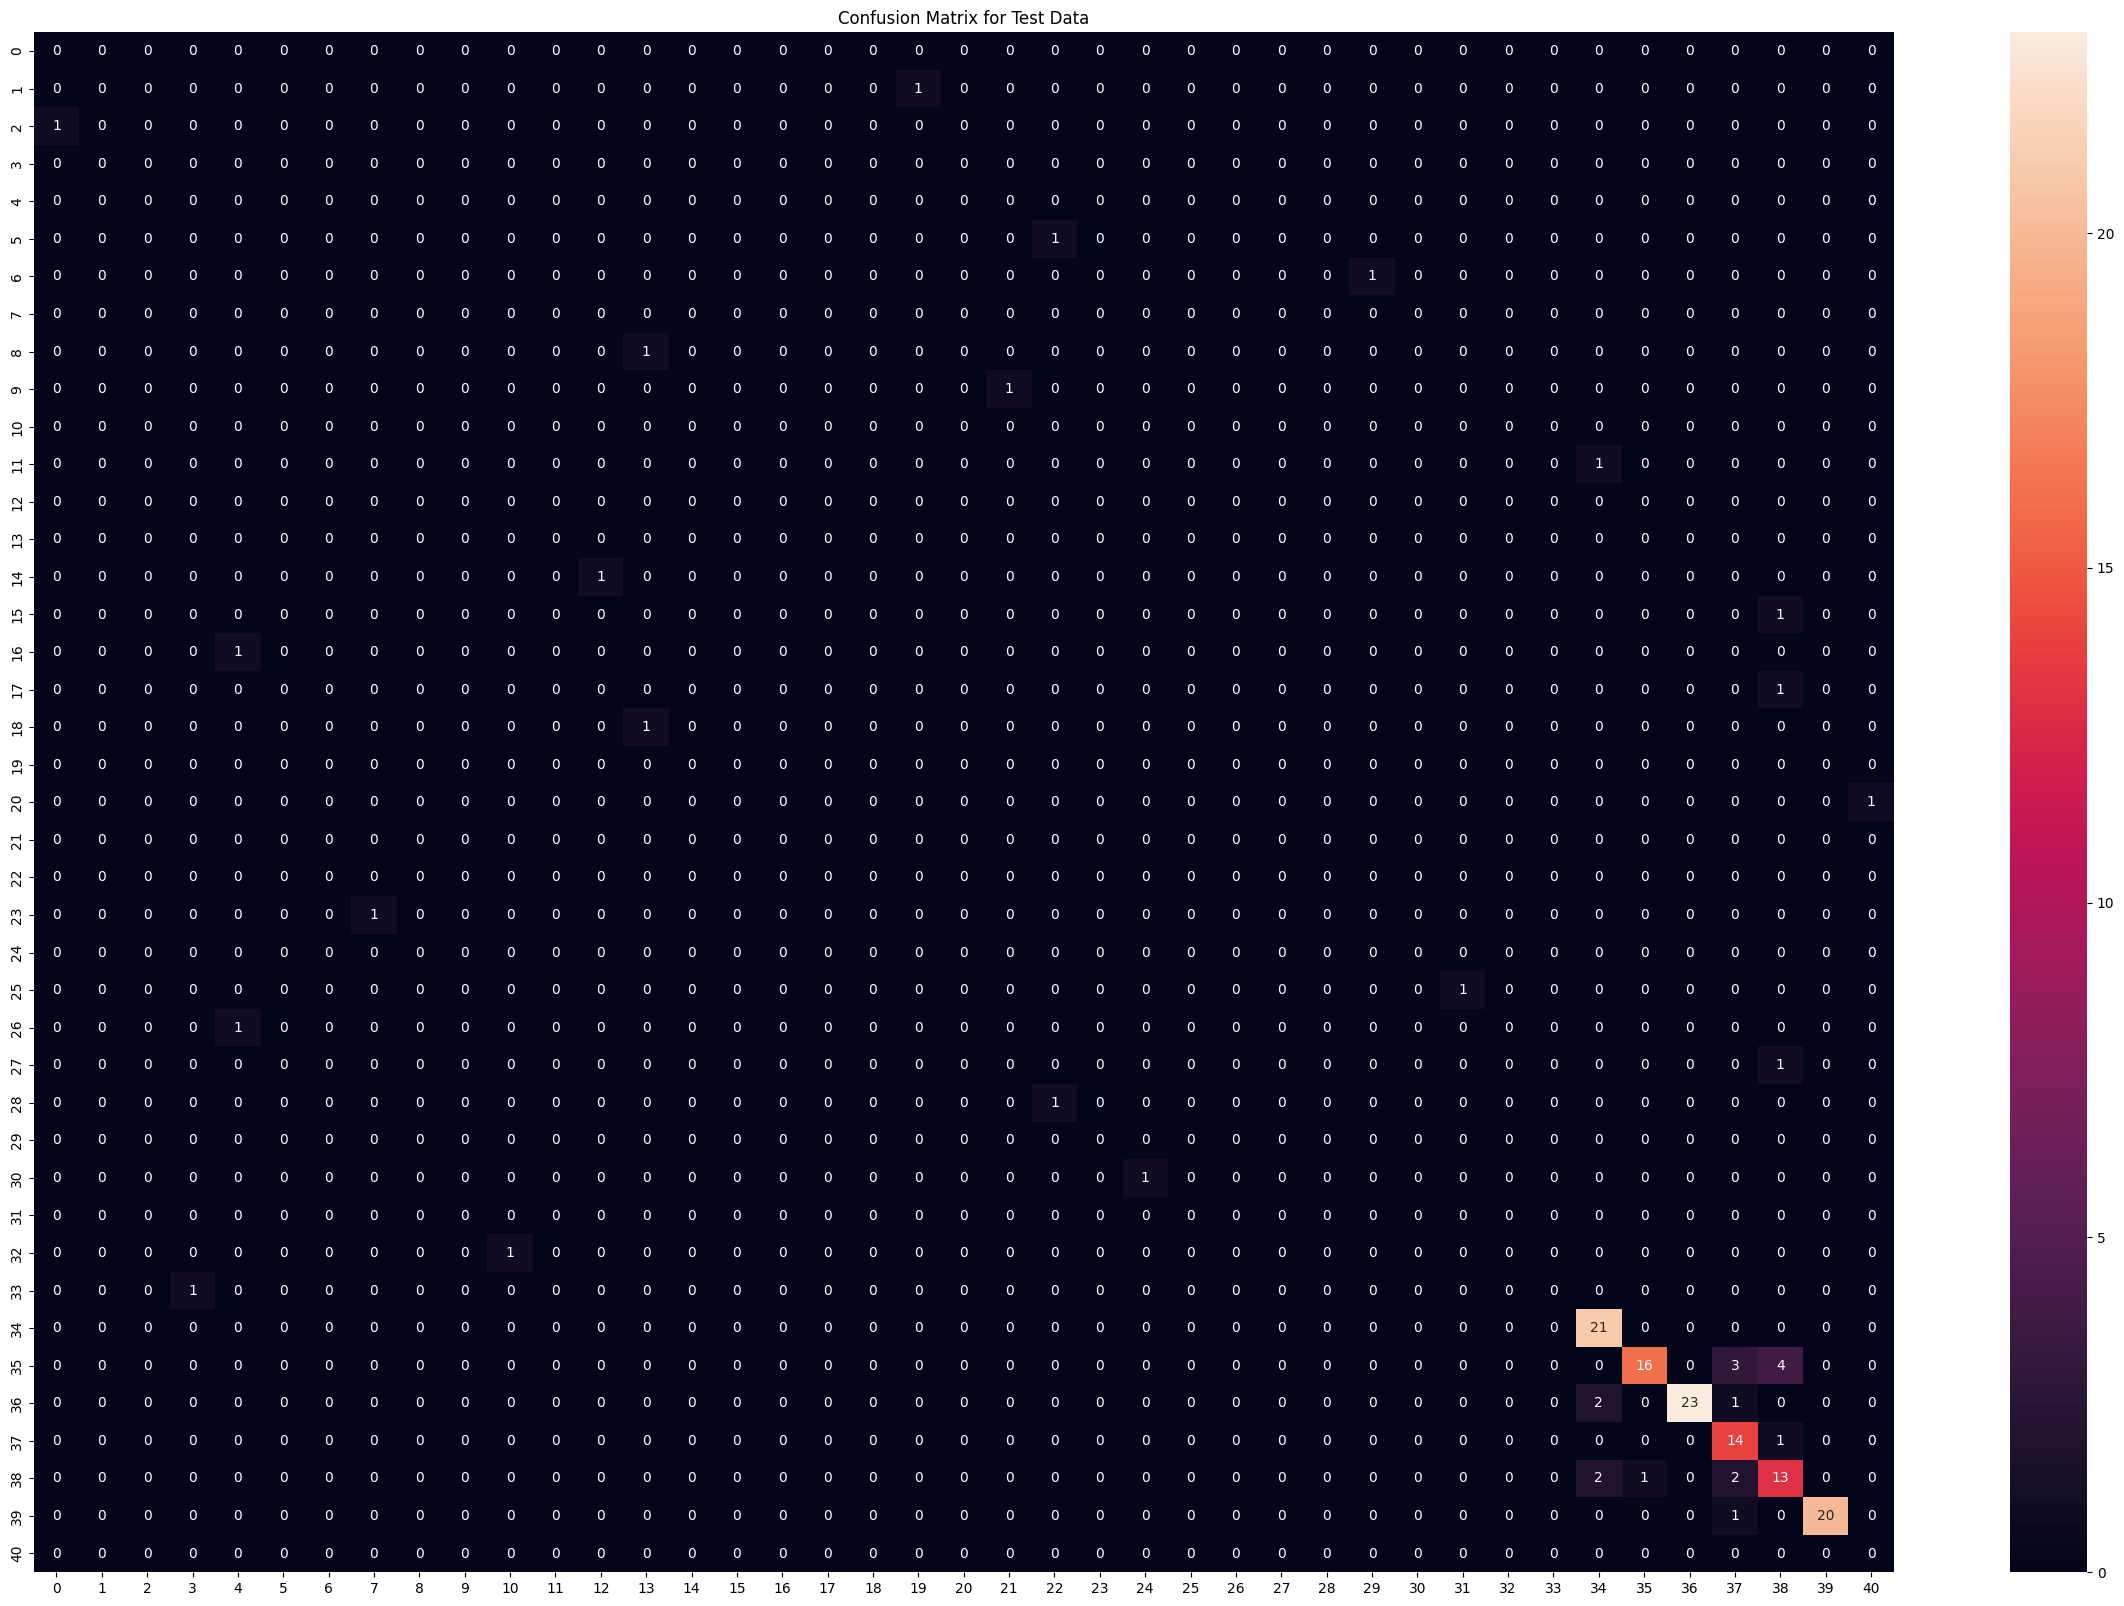


Accuracy on Whole Data: 89.04299583911235%


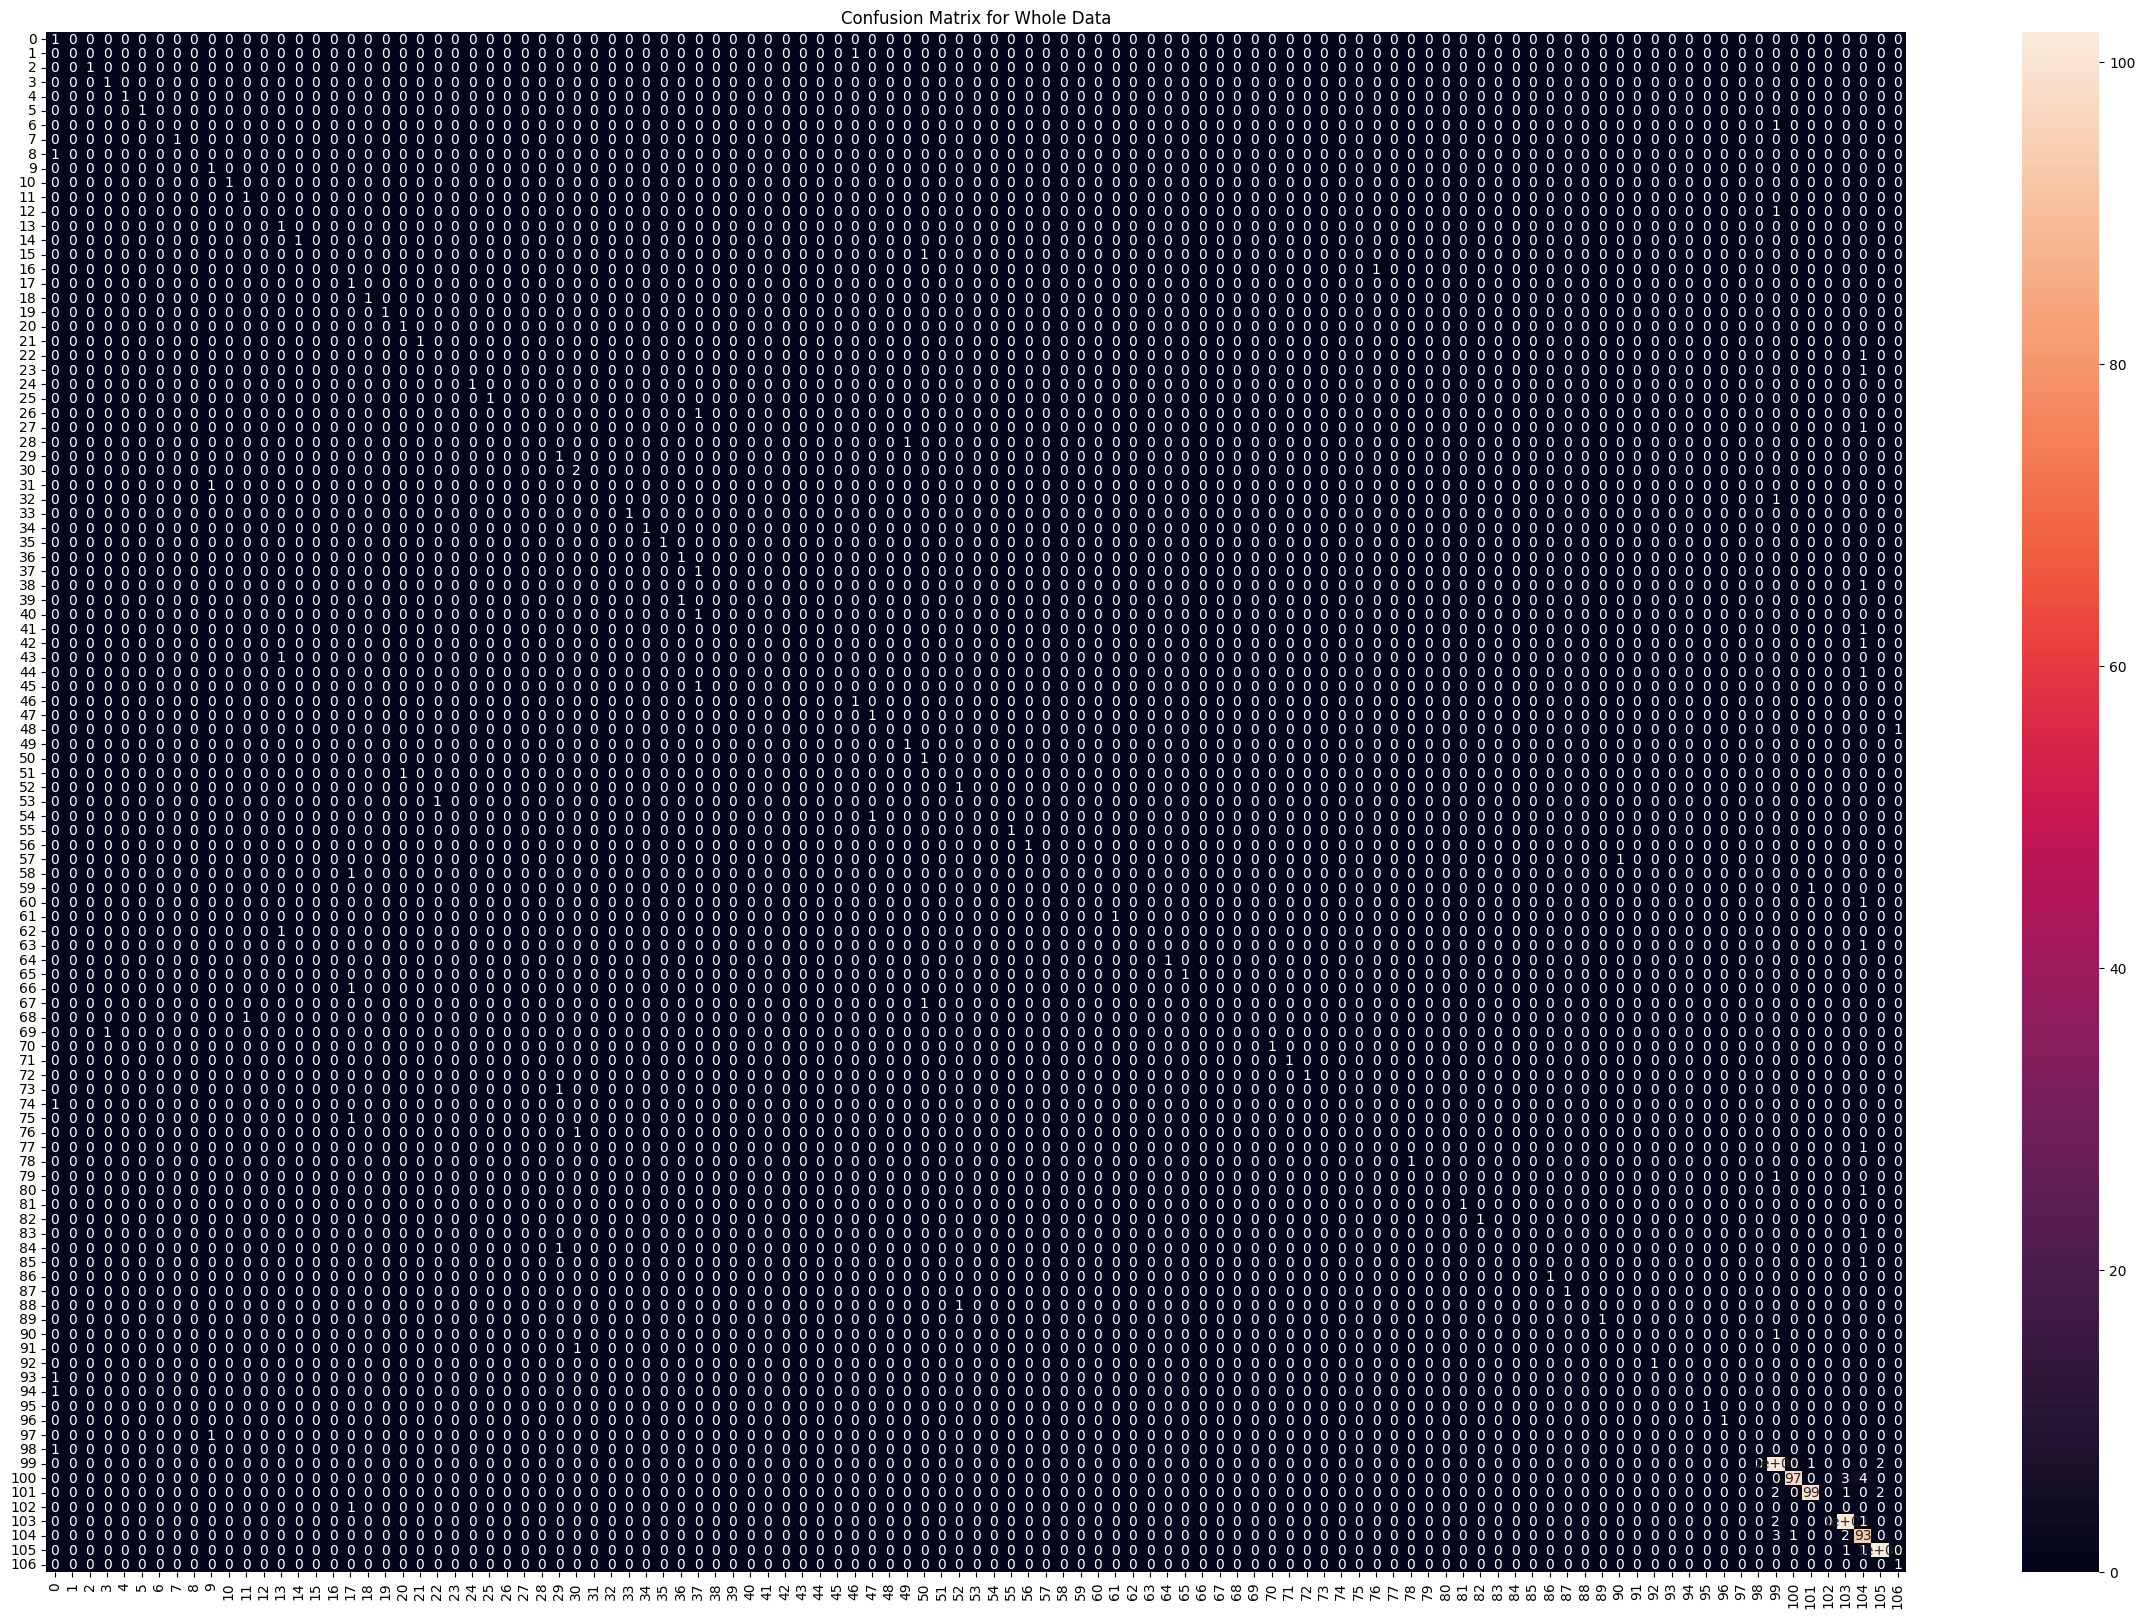

In [27]:
xgb_pipeline = make_pipeline( StandardScaler(), XGBClassifier(random_state = 18,max_iter=1000000)).fit(X_train, y_train)
xgb_best=xgb_pipeline
# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (30,20))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('XGBoost Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (30,20))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Decision Tree Classifier

Accuracy on Test Data: 73.10344827586206%


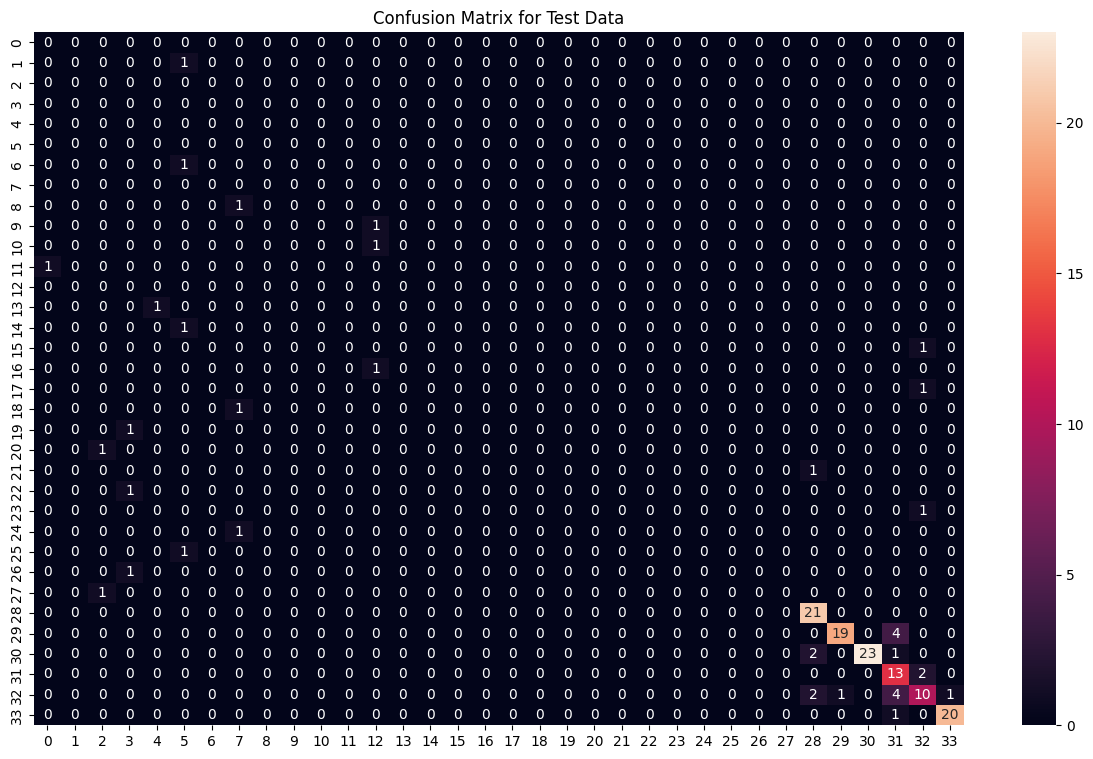


Accuracy on Whole Data: 79.750346740638%


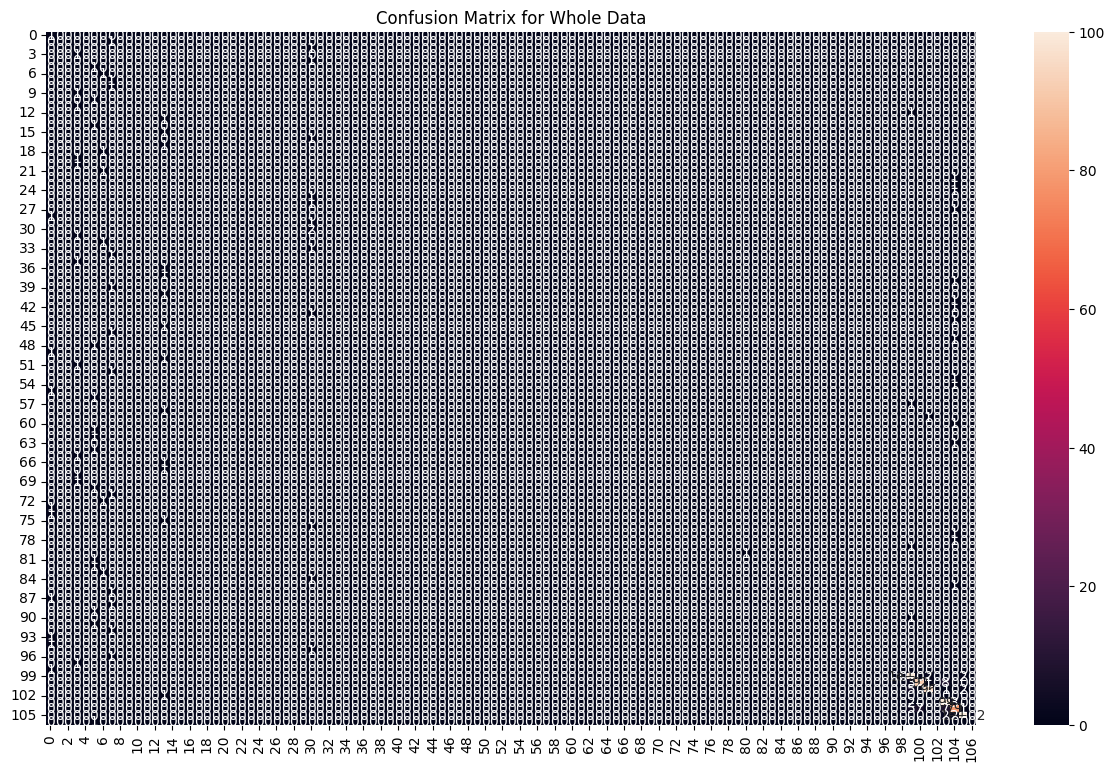

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)).fit(X_train, y_train)
dt_best=dt_pipeline
# Accuray On Test Data
predictions = dt_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = dt_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Decision Tree Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Gaussian Naive Bayes (GaussianNB)

Accuracy on Test Data: 70.34482758620689%


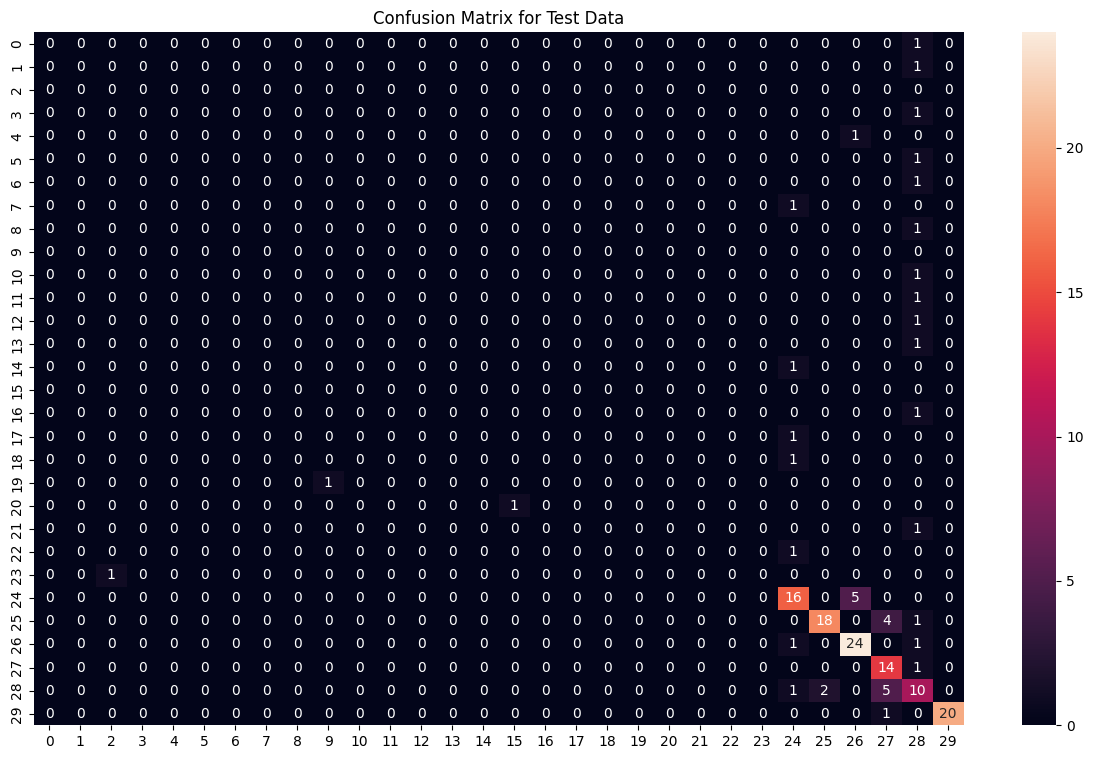


Accuracy on Whole Data: 85.99167822468793%


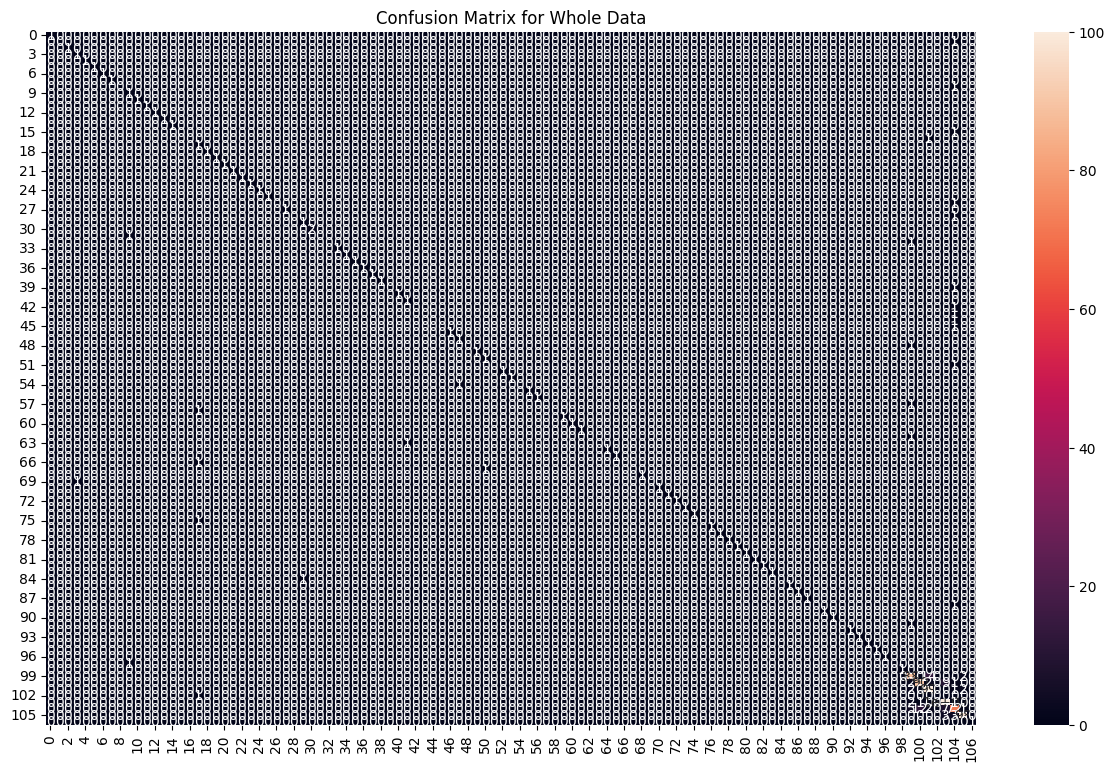

In [29]:
from sklearn.naive_bayes import GaussianNB

nb_pipeline = make_pipeline(StandardScaler(), GaussianNB()).fit(X_train, y_train)
nb_best=nb_pipeline
# Accuray On Test Data
predictions = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = nb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Naive Bayes Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Comparison on Accuracy of Entire Data for The Models Trained

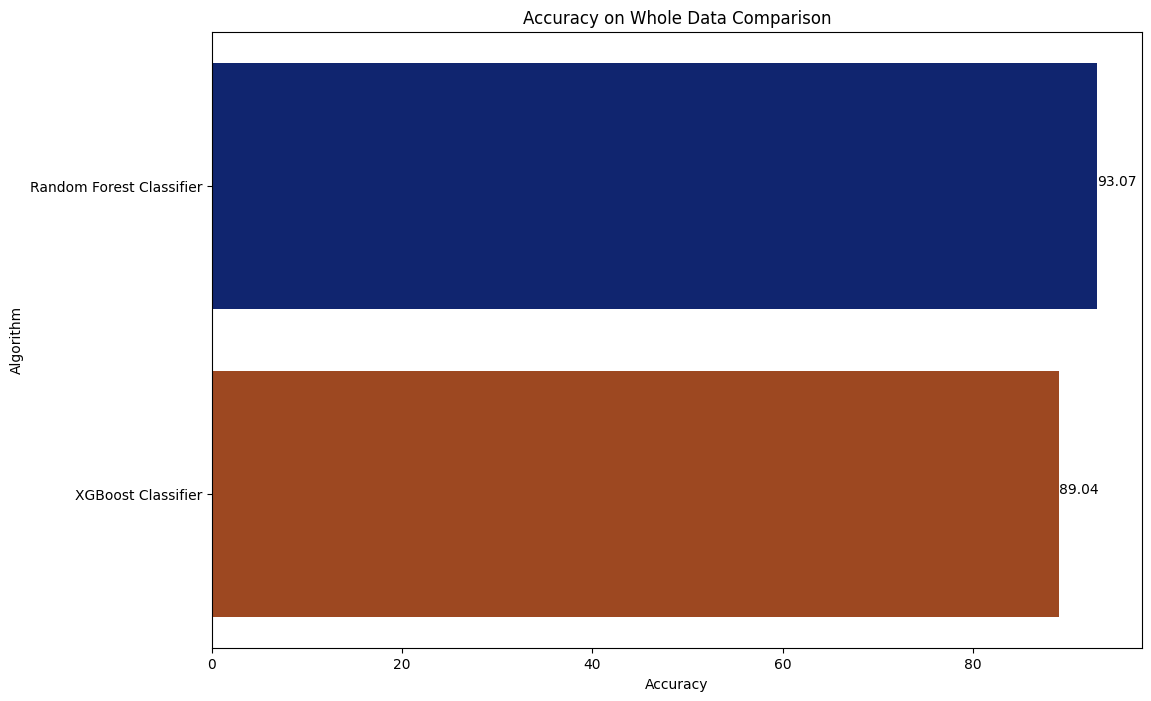

In [ ]:
plt.figure(figsize=[12,8],dpi = 100)
plt.title('Accuracy on Whole Data Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
for index, value in enumerate(acc):
    plt.text(value, index, str(round(value,2)))

Comparison on Accuracy of Test Data for The Models Trained

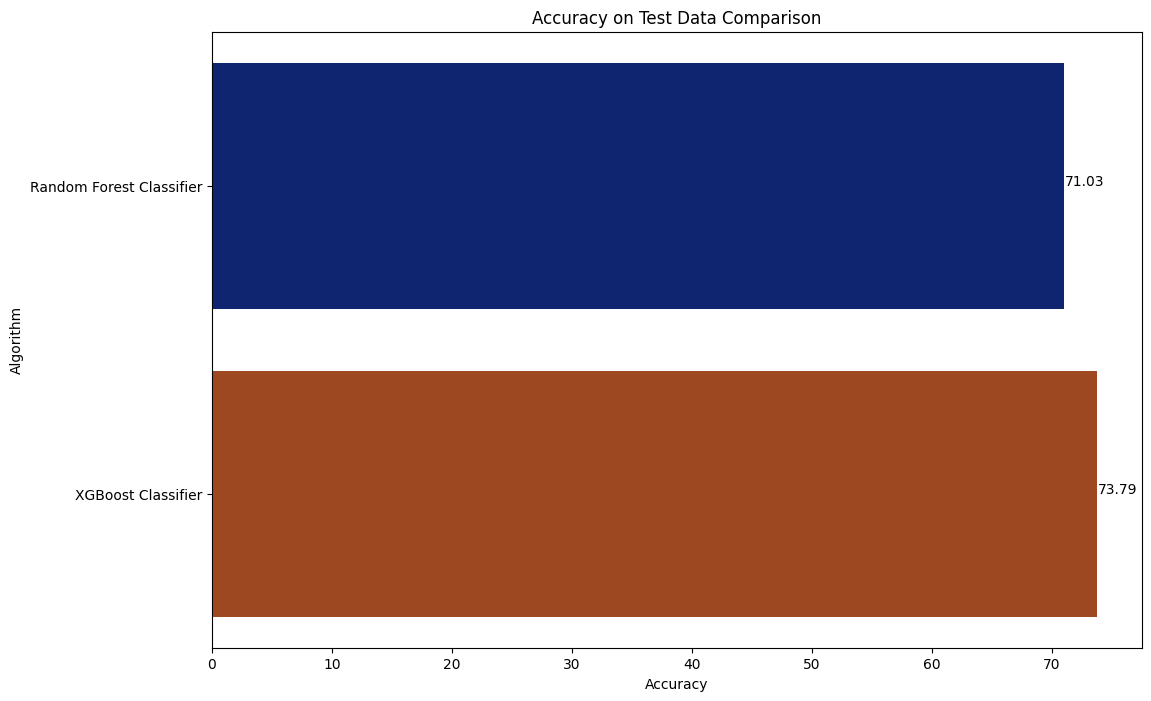

In [ ]:
plt.figure(figsize=[12,8],dpi = 100)
plt.title('Accuracy on Test Data Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_test,y = model,palette='dark')
for index, value in enumerate(acc_test):
    plt.text(value, index, str(round(value,2)))

In [ ]:
pickle.dump(lr_pipeline, open("nb_pipeline.pkl", "wb"))
pickle.dump(knn_pipeline, open("knn_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open("rf_pipeline.pkl", "wb"))
pickle.dump(xgb_pipeline, open("xgb_pipeline.pkl", "wb"))
pickle.dump(dt_pipeline, open("dt_pipeline.pkl", "wb"))
pickle.dump(nb_pipeline, open("nb_pipeline.pkl", "wb"))

pickle.dump(label_dict, open("label_dictionary.pkl", "wb"))
print("Saved All Models")

Saved All Models


GradientBoosting

Accuracy on Test Data: 69.6551724137931%


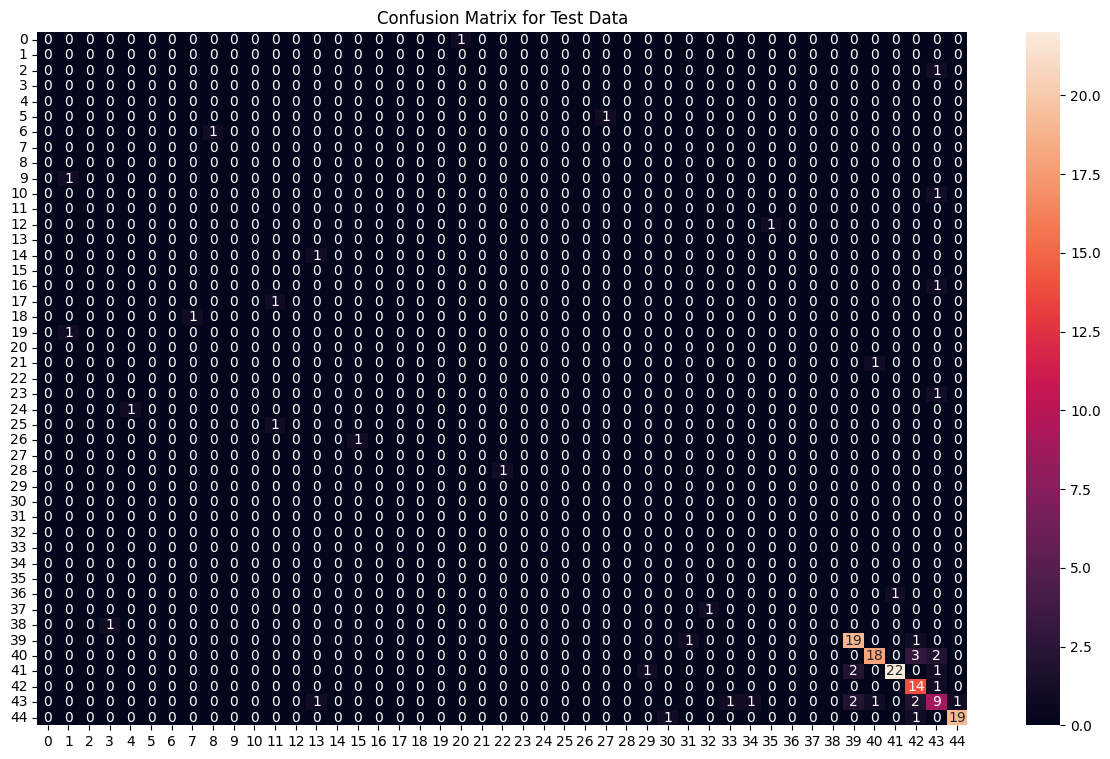


Accuracy on Whole Data: 92.7877947295423%


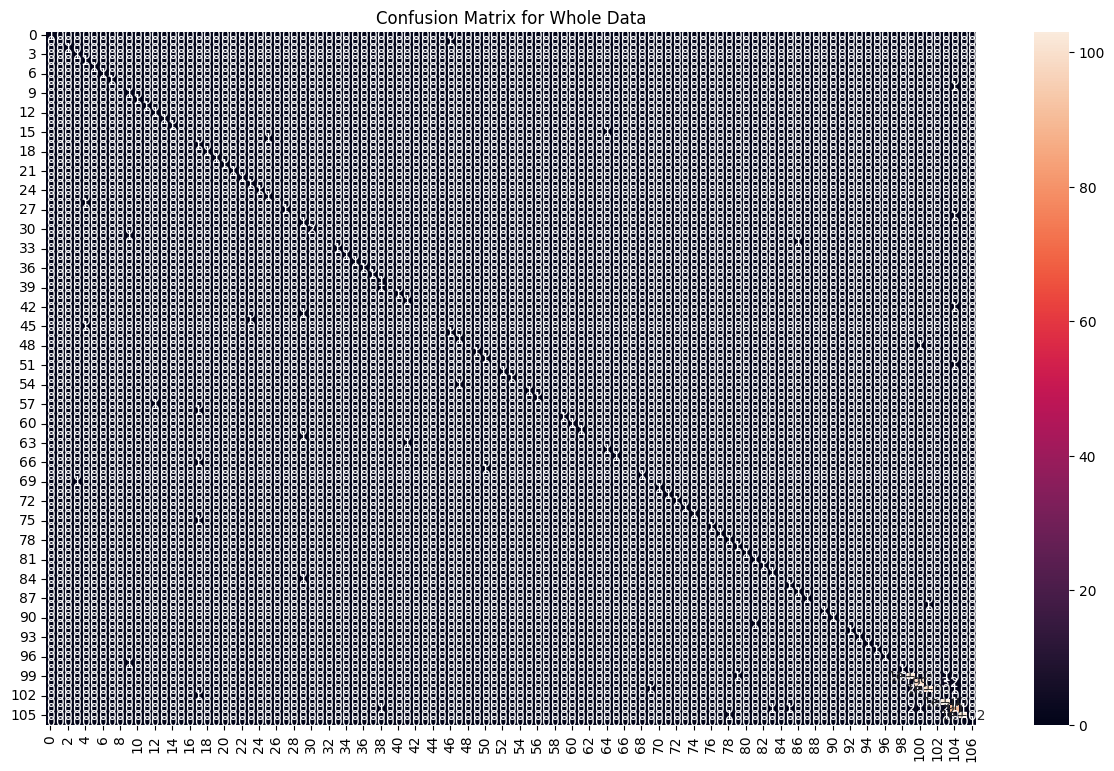

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create GradientBoostingClassifier object
gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=8, random_state=18)

# Create StandardScaler object
scaler = StandardScaler()

# Create pipeline object
pipeline = make_pipeline(scaler, gb_clf)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
gb_best = pipeline

# Predict using the pipeline
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Gradient Boosting')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [31]:
pickle.dump(pipeline, open("pipeline.pkl", "wb"))

SVM CLASSFIER

Accuracy on Test Data: 70.34482758620689%


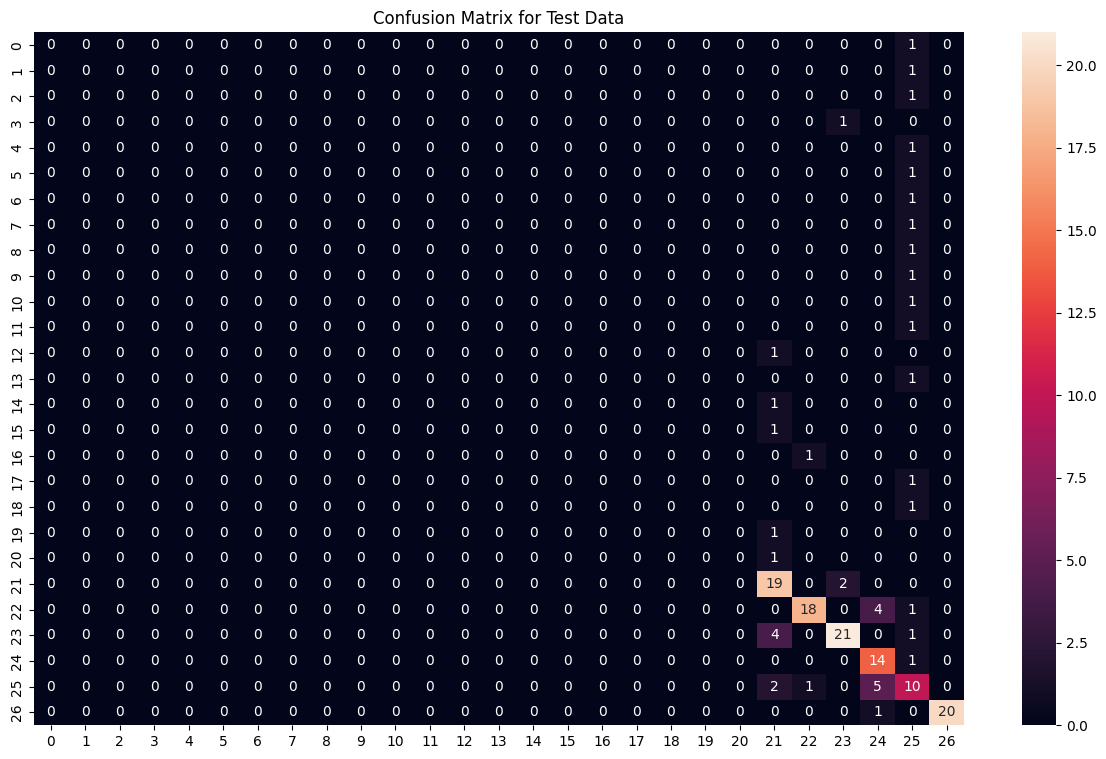


Accuracy on Whole Data: 78.2246879334258%


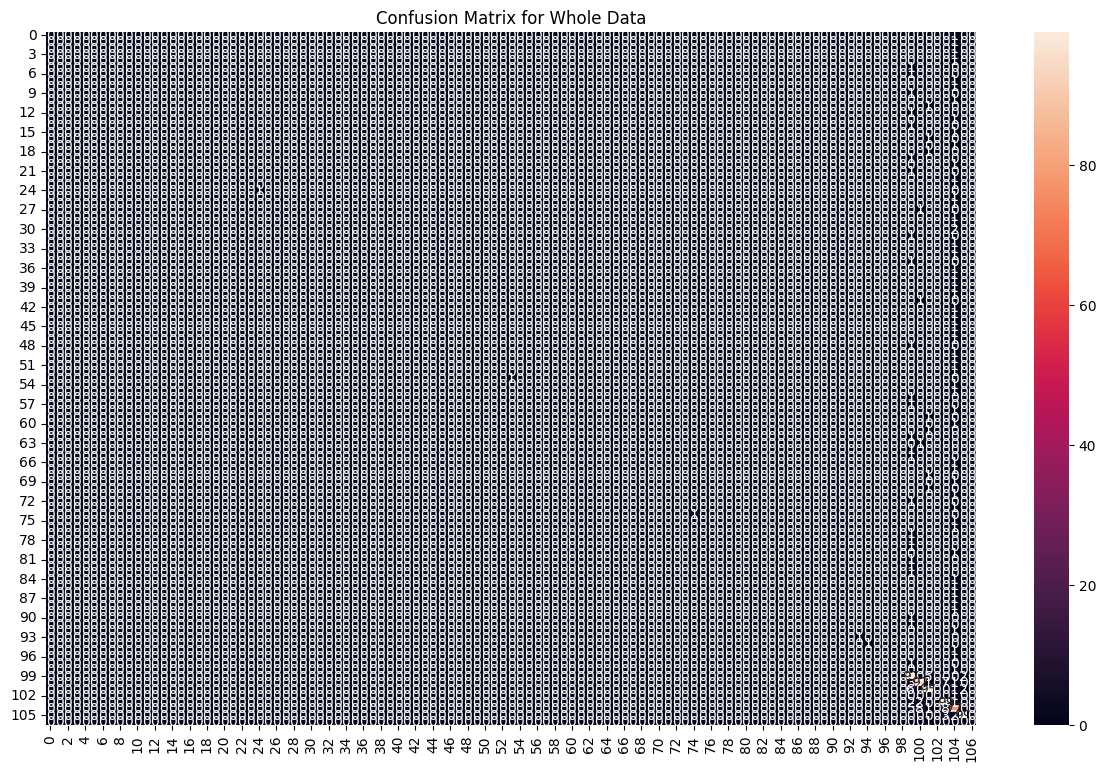

In [38]:
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scalar=StandardScaler()
classifier = SVC(gamma='auto',probability=True, random_state=18)
 
svm_pipeline= make_pipeline(scalar,classifier)
svm_pipeline.fit(X_train, y_train)

sv_best = svm_pipeline

# Predict using the pipeline
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Support vector machine')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()


ENSEMBLE METHOD

Accuracy on Test Data: 73.79310344827587%


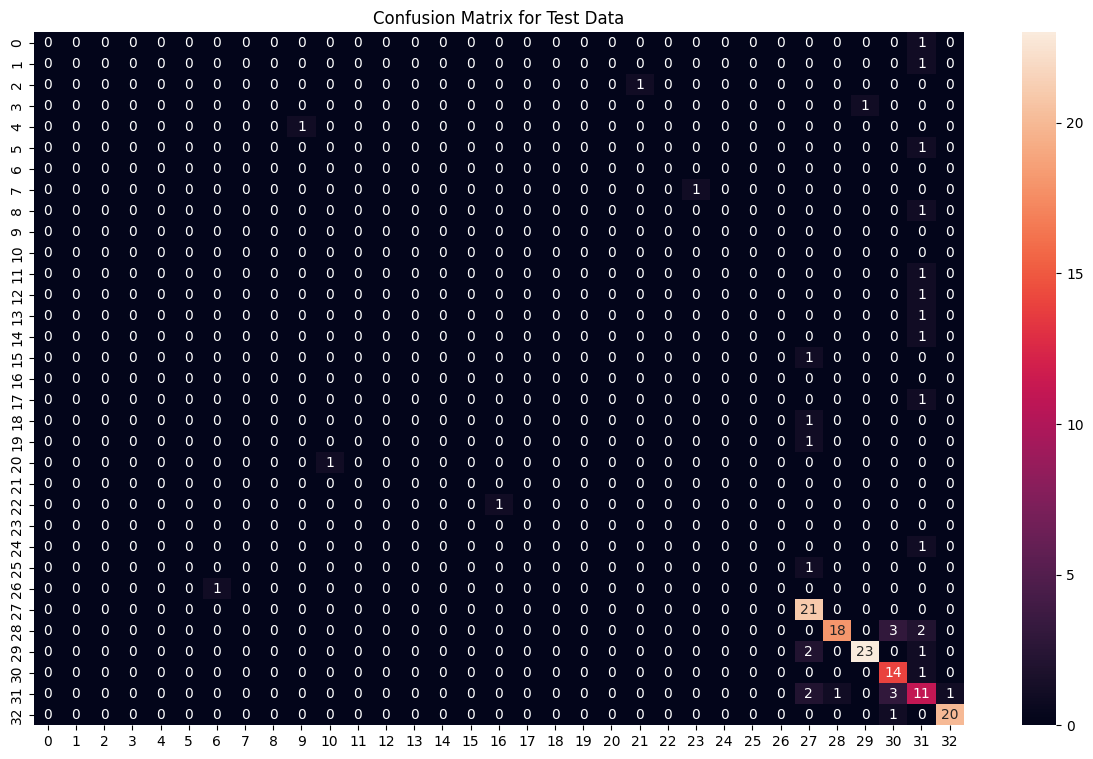


Accuracy on Whole Data: 90.42995839112345%


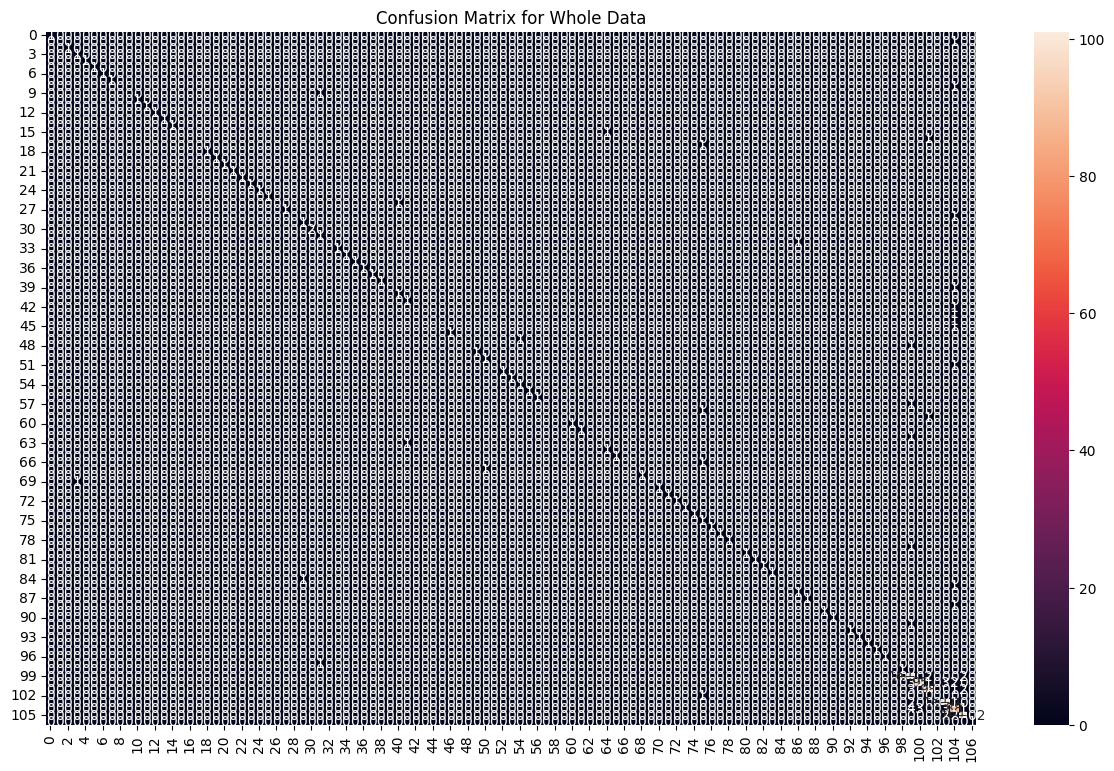

In [39]:
from sklearn.ensemble import VotingClassifier

# Create our voting classifier, inputting our models.
estimators=[ ('rf', rf_best),('gb', gb_best),('sv', sv_best),('nb', nb_best),('xgb', xgb_best),('dt', dt_best),('lr', lr_best),('knn', knn_best)]
ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X_train, y_train)


predictions = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = ensemble.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Ensemble')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [40]:
pickle.dump(ensemble, open("ensemble.pkl", "wb"))